In [93]:
#```{r results='hide', message=FALSE, warning=FALSE}
# install all Packages required
# install.packages('ggplot2')
# Load Libraries to be used
library(ggplot2)
library(knitr)
library(dplyr)
library(tidyverse)
library(summarytools)
library(visdat)
library(igraph)
#library(treemap)
#library(dplyr)
library(devtools)
library("readxl")
library(repr)

#install.packages("readxl")

# my_data <- read_excel(file.choose())
#```# Do not show warnings

In [2]:
# Change plot size to 4 x 3
options(repr.plot.width=12, repr.plot.height=12)

In [3]:
credit_df <- read_excel("Data/credit.xlsx", sheet="Sheet1")
head(credit_df)

check,savings,history,purpose,duration,amount,employed,perc_income,resid,age,other_credit,housing,n_loans,job,depend,phone,default
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
< 0 SEK,unknown,critical,furniture/appliances,6,116900,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 20000 SEK,< 10000 SEK,good,furniture/appliances,48,595100,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,< 10000 SEK,critical,education,12,209600,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
< 0 SEK,< 10000 SEK,good,furniture/appliances,42,788200,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
< 0 SEK,< 10000 SEK,poor,car,24,487000,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
unknown,unknown,good,education,36,905500,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no


In [4]:
colnames(credit_df)

[1] "check"        "savings"      "history"      "purpose"      "duration"    
 [6] "amount"       "employed"     "perc_income"  "resid"        "age"         
[11] "other_credit" "housing"      "n_loans"      "job"          "depend"      
[16] "phone"        "default"

In [5]:
simple_df <- select(credit_df, check,savings,duration,default)
head(simple_df)

check,savings,duration,default
<chr>,<chr>,<dbl>,<chr>
< 0 SEK,unknown,6,no
1 - 20000 SEK,< 10000 SEK,48,yes
unknown,< 10000 SEK,12,no
< 0 SEK,< 10000 SEK,42,no
< 0 SEK,< 10000 SEK,24,yes
unknown,unknown,36,no


In [6]:
# Change to factors

simple_df$check <- as.factor(simple_df$check)
simple_df$savings <- as.factor(simple_df$savings)
simple_df$default <- as.factor(simple_df$default)
head(simple_df)

check,savings,duration,default
<fct>,<fct>,<dbl>,<fct>
< 0 SEK,unknown,6,no
1 - 20000 SEK,< 10000 SEK,48,yes
unknown,< 10000 SEK,12,no
< 0 SEK,< 10000 SEK,42,no
< 0 SEK,< 10000 SEK,24,yes
unknown,unknown,36,no


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



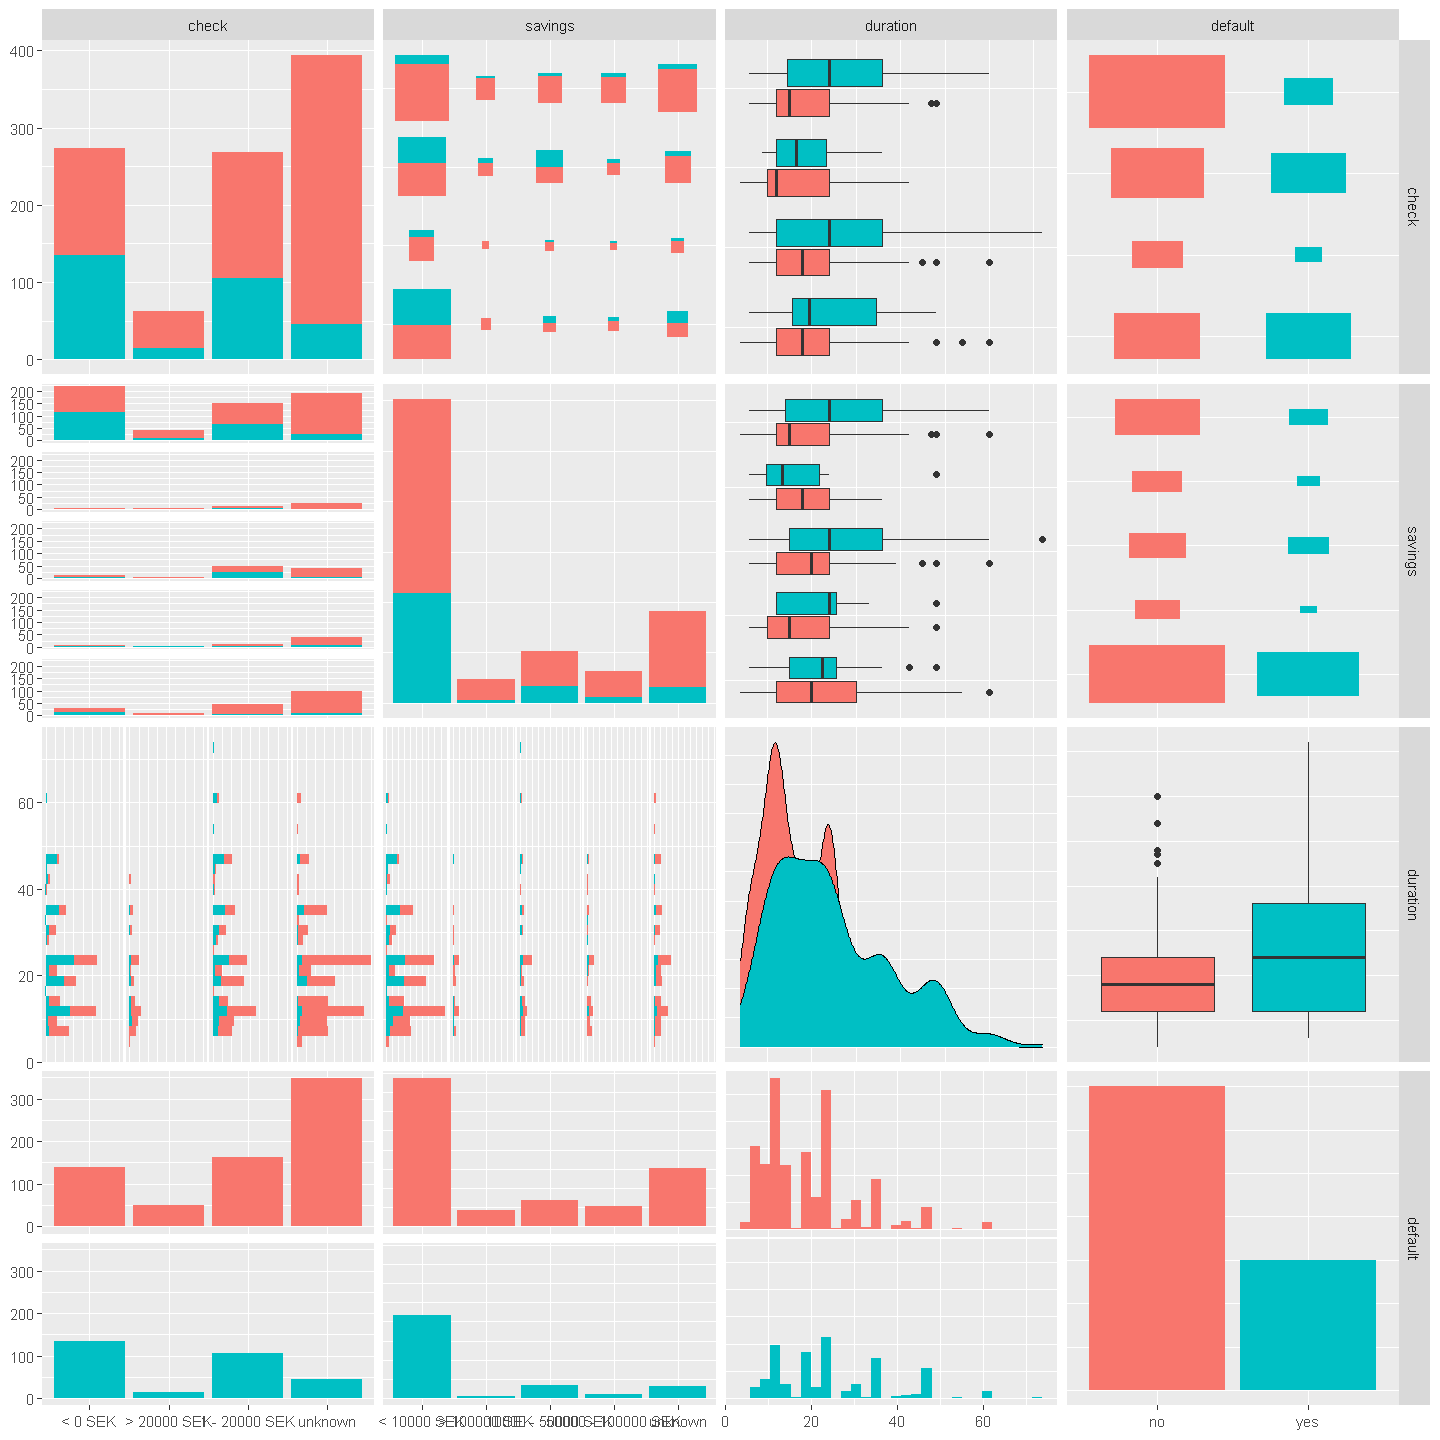

In [7]:
GGally::ggpairs(select(simple_df, check:default), mapping = aes(color=default))

In [8]:
simple_df$dur_pred <- factor(ifelse(simple_df$duration >= 35,"yes","no"))
head(simple_df)

check,savings,duration,default,dur_pred
<fct>,<fct>,<dbl>,<fct>,<fct>
< 0 SEK,unknown,6,no,no
1 - 20000 SEK,< 10000 SEK,48,yes,yes
unknown,< 10000 SEK,12,no,no
< 0 SEK,< 10000 SEK,42,no,yes
< 0 SEK,< 10000 SEK,24,yes,no
unknown,unknown,36,no,yes


In [9]:
x <- table(simple_df$dur_pred,simple_df$default, dnn=c("predicted","actual"))
x

         actual
predicted  no yes
      no  612 218
      yes  88  82

In [10]:
acc <- (x[1,1]+x[2,2])/sum(x)
acc

[1] 0.694

Marginal Frequencies

In [11]:
margin.table(x,1) # Row marginal frequencies

predicted
 no yes 
830 170 

In [12]:
margin.table(x,2) # Column marginal frequencies

actual
 no yes 
700 300 

In [13]:
round(prop.table(x,1),3) # Row %

         actual
predicted    no   yes
      no  0.737 0.263
      yes 0.518 0.482

In [14]:
round(prop.table(x,2),3) # Column %

         actual
predicted    no   yes
      no  0.874 0.727
      yes 0.126 0.273

In [15]:
round(prop.table(x),3) # Cell %

         actual
predicted    no   yes
      no  0.612 0.218
      yes 0.088 0.082

In [16]:
gmodels::CrossTable(x= simple_df$dur_pred,y= simple_df$default, prop.chisq = F)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1000 

 
                   | simple_df$default 
simple_df$dur_pred |        no |       yes | Row Total | 
-------------------|-----------|-----------|-----------|
                no |       612 |       218 |       830 | 
                   |     0.737 |     0.263 |     0.830 | 
                   |     0.874 |     0.727 |           | 
                   |     0.612 |     0.218 |           | 
-------------------|-----------|-----------|-----------|
               yes |        88 |        82 |       170 | 
                   |     0.518 |     0.482 |     0.170 | 
                   |     0.126 |     0.273 |           | 
                   |     0.088 |     0.082 |           | 
-------------------|-----------|-----------|-----------|
      Column Total |       700 |     

Chi-square Test of the Table

In [17]:
chisq.test(x)


	Pearson's Chi-squared test with Yates' continuity correction

data:  x
X-squared = 31.394, df = 1, p-value = 2.106e-08


In [18]:
caret::confusionMatrix(simple_df$dur_pred,simple_df$default,dnn=c("predicted","actual") )

Confusion Matrix and Statistics

         actual
predicted  no yes
      no  612 218
      yes  88  82
                                          
               Accuracy : 0.694           
                 95% CI : (0.6644, 0.7225)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.6744          
                                          
                  Kappa : 0.1685          
                                          
 Mcnemar's Test P-Value : 1.65e-13        
                                          
            Sensitivity : 0.8743          
            Specificity : 0.2733          
         Pos Pred Value : 0.7373          
         Neg Pred Value : 0.4824          
             Prevalence : 0.7000          
         Detection Rate : 0.6120          
   Detection Prevalence : 0.8300          
      Balanced Accuracy : 0.5738          
                                          
       'Positive' Class : no              
                                     

![Alt text](./Data/confMat.jpeg)

In [19]:
mod <- glm(default~duration, family =binomial(link = "logit"), data=simple_df)

In [20]:
summary(mod)


Call:
glm(formula = default ~ duration, family = binomial(link = "logit"), 
    data = simple_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4342  -0.8740  -0.7206   1.3138   1.8185  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.666351   0.146615 -11.365  < 2e-16 ***
duration     0.037538   0.005703   6.582 4.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1221.7  on 999  degrees of freedom
Residual deviance: 1177.1  on 998  degrees of freedom
AIC: 1181.1

Number of Fisher Scoring iterations: 4


In [21]:
p <- predict(mod)

In [22]:
summary(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.5162 -1.2159 -0.9907 -0.8817 -0.7654  1.0364 

In [23]:
p_class <- factor(ifelse(p>0.1, "yes", "no"))
table(p_class)

p_class
 no yes 
936  64 

In [24]:
table(p_class, simple_df$default, dnn=c("predicted","actual"))

         actual
predicted  no yes
      no  672 264
      yes  28  36

In [25]:
caret::confusionMatrix(p_class, simple_df[["default"]])

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  672 264
       yes  28  36
                                         
               Accuracy : 0.708          
                 95% CI : (0.6787, 0.736)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.3036         
                                         
                  Kappa : 0.1032         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9600         
            Specificity : 0.1200         
         Pos Pred Value : 0.7179         
         Neg Pred Value : 0.5625         
             Prevalence : 0.7000         
         Detection Rate : 0.6720         
   Detection Prevalence : 0.9360         
      Balanced Accuracy : 0.5400         
                                         
       'Positive' Class : no             
                                         

In [26]:
colnames(simple_df)

[1] "check"    "savings"  "duration" "default"  "dur_pred"

In [27]:
#mod <- glm(default~ as.factor(check) + as.factor(savings) + duration, data=simple_df)
#summary(mod)

mod <- glm(default~duration+check+savings, family =binomial(link = "logit"), data=simple_df)
summary(mod)


Call:
glm(formula = default ~ duration + check + savings, family = binomial(link = "logit"), 
    data = simple_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6793  -0.8413  -0.4751   0.9414   2.5235  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.729609   0.181524  -4.019 5.84e-05 ***
duration                   0.038745   0.006284   6.165 7.03e-10 ***
check> 20000 SEK          -1.056790   0.334928  -3.155 0.001603 ** 
check1 - 20000 SEK        -0.411894   0.185635  -2.219 0.026498 *  
checkunknown              -1.860026   0.207133  -8.980  < 2e-16 ***
savings> 100000 SEK       -1.016961   0.465378  -2.185 0.028871 *  
savings10000 - 50000 SEK  -0.070301   0.253174  -0.278 0.781258    
savings50000 - 100000 SEK -0.459951   0.366495  -1.255 0.209479    
savingsunknown            -0.805320   0.231038  -3.486 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispe

In [28]:
p <- predict(mod)
summary(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.3741 -2.0001 -0.9571 -1.0624 -0.2597  1.5951 

In [29]:
p_class <- factor(ifelse(p>0.3, "yes", "no"))
table(p_class)

p_class
 no yes 
917  83 

In [31]:
#install.packages("gmodels")

Installing package into 'C:/Users/woosh/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\woosh\AppData\Local\Temp\RtmpsZwB5W\downloaded_packages


In [32]:
gmodels::CrossTable(p_class, simple_df$default, dnn=c("predicted","actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1000 

 
             | actual 
   predicted |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |       674 |       243 |       917 | 
             |     1.605 |     3.746 |           | 
             |     0.735 |     0.265 |     0.917 | 
             |     0.963 |     0.810 |           | 
             |     0.674 |     0.243 |           | 
-------------|-----------|-----------|-----------|
         yes |        26 |        57 |        83 | 
             |    17.735 |    41.382 |           | 
             |     0.313 |     0.687 |     0.083 | 
             |     0.037 |     0.190 |           | 
             |     0.026 |     0.057 |           | 
-------------|-----------|-----------|-------

In [33]:
caret::confusionMatrix(p_class, simple_df[["default"]])

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  674 243
       yes  26  57
                                          
               Accuracy : 0.731           
                 95% CI : (0.7024, 0.7583)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.01694         
                                          
                  Kappa : 0.1927          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.9629          
            Specificity : 0.1900          
         Pos Pred Value : 0.7350          
         Neg Pred Value : 0.6867          
             Prevalence : 0.7000          
         Detection Rate : 0.6740          
   Detection Prevalence : 0.9170          
      Balanced Accuracy : 0.5764          
                                          
       'Positive' Class : no              
                              

In [35]:
p_class <- factor(ifelse(p>0.1, "yes", "no"))
gmodels::CrossTable(p_class, simple_df$default, dnn=c("predicted","actual"))
caret::confusionMatrix(p_class, simple_df[["default"]])


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1000 

 
             | actual 
   predicted |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |       644 |       207 |       851 | 
             |     3.916 |     9.138 |           | 
             |     0.757 |     0.243 |     0.851 | 
             |     0.920 |     0.690 |           | 
             |     0.644 |     0.207 |           | 
-------------|-----------|-----------|-----------|
         yes |        56 |        93 |       149 | 
             |    22.367 |    52.190 |           | 
             |     0.376 |     0.624 |     0.149 | 
             |     0.080 |     0.310 |           | 
             |     0.056 |     0.093 |           | 
-------------|-----------|-----------|-------

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  644 207
       yes  56  93
                                          
               Accuracy : 0.737           
                 95% CI : (0.7085, 0.7641)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 0.005458        
                                          
                  Kappa : 0.2686          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9200          
            Specificity : 0.3100          
         Pos Pred Value : 0.7568          
         Neg Pred Value : 0.6242          
             Prevalence : 0.7000          
         Detection Rate : 0.6440          
   Detection Prevalence : 0.8510          
      Balanced Accuracy : 0.6150          
                                          
       'Positive' Class : no              
                              

![Alt text](./Data/confusionMatrix.jpg)

In [36]:
colnames(credit_df)

[1] "check"        "savings"      "history"      "purpose"      "duration"    
 [6] "amount"       "employed"     "perc_income"  "resid"        "age"         
[11] "other_credit" "housing"      "n_loans"      "job"          "depend"      
[16] "phone"        "default"

In [37]:
head(credit_df,3)

check,savings,history,purpose,duration,amount,employed,perc_income,resid,age,other_credit,housing,n_loans,job,depend,phone,default
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
< 0 SEK,unknown,critical,furniture/appliances,6,116900,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 20000 SEK,< 10000 SEK,good,furniture/appliances,48,595100,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,< 10000 SEK,critical,education,12,209600,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no


In [54]:
unique(credit_df$employed)

[1] "> 7 years"   "1 - 4 years" "4 - 7 years" "unemployed"  "< 1 year"

In [73]:
credit_df2$default <- as.factor(credit_df2$default )
credit_df2$check <- as.factor(credit_df2$check)
credit_df2$savings <- as.factor(credit_df2$savings)
credit_df2$history <- as.factor(credit_df2$history)
credit_df2$purpose <- as.factor(credit_df2$purpose)
credit_df2$employed <- as.factor(credit_df2$employed)
credit_df2$other_credit <- as.factor(credit_df2$other_credit)
credit_df2$housing <- as.factor(credit_df2$housing)
credit_df2$job <- as.factor(credit_df2$job)
credit_df2$phone <- as.factor(credit_df2$phone)

#sapply(credit_df2,mode)

#sapply(credit_df2, class)

check      savings      history      purpose     duration       amount 
    "factor"     "factor"     "factor"     "factor"    "numeric"    "numeric" 
    employed  perc_income        resid          age other_credit      housing 
    "factor"    "numeric"    "numeric"    "numeric"     "factor"     "factor" 
     n_loans          job       depend        phone      default 
   "numeric"     "factor"    "numeric"     "factor"     "factor"

In [81]:
mod <- glm(default~check+savings+history+purpose+duration+amount+employed+perc_income+resid+age+other_credit+housing+n_loans+job+depend+phone,family =binomial(link = "logit"), data=credit_df2)
summary(mod)


Call:
glm(formula = default ~ check + savings + history + purpose + 
    duration + amount + employed + perc_income + resid + age + 
    other_credit + housing + n_loans + job + depend + phone, 
    family = binomial(link = "logit"), data = credit_df2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9135  -0.7726  -0.4109   0.8111   2.6446  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.510e+00  8.935e-01  -1.690 0.090968 .  
check> 20000 SEK            -8.787e-01  3.585e-01  -2.451 0.014241 *  
check1 - 20000 SEK          -4.031e-01  2.038e-01  -1.978 0.047943 *  
checkunknown                -1.730e+00  2.228e-01  -7.764 8.25e-15 ***
savings> 100000 SEK         -1.144e+00  4.999e-01  -2.288 0.022157 *  
savings10000 - 50000 SEK    -1.878e-01  2.696e-01  -0.696 0.486134    
savings50000 - 100000 SEK   -3.879e-01  3.969e-01  -0.977 0.328374    
savingsunknown              -9.154e-01  2.491e-01

In [82]:
p <- predict(mod)
summary(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.1167 -2.2074 -1.0990 -1.1743 -0.1336  2.4934 

In [91]:
p_class <- factor(ifelse(p>0.3, "yes", "no"))
gmodels::CrossTable(p_class, simple_df$default, dnn=c("predicted","actual"))
caret::confusionMatrix(p_class, credit_df2[["default"]])


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1000 

 
             | actual 
   predicted |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |       652 |       185 |       837 | 
             |     7.457 |    17.400 |           | 
             |     0.779 |     0.221 |     0.837 | 
             |     0.931 |     0.617 |           | 
             |     0.652 |     0.185 |           | 
-------------|-----------|-----------|-----------|
         yes |        48 |       115 |       163 | 
             |    38.293 |    89.350 |           | 
             |     0.294 |     0.706 |     0.163 | 
             |     0.069 |     0.383 |           | 
             |     0.048 |     0.115 |           | 
-------------|-----------|-----------|-------

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  652 185
       yes  48 115
                                          
               Accuracy : 0.767           
                 95% CI : (0.7395, 0.7929)
    No Information Rate : 0.7             
    P-Value [Acc > NIR] : 1.33e-06        
                                          
                  Kappa : 0.362           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9314          
            Specificity : 0.3833          
         Pos Pred Value : 0.7790          
         Neg Pred Value : 0.7055          
             Prevalence : 0.7000          
         Detection Rate : 0.6520          
   Detection Prevalence : 0.8370          
      Balanced Accuracy : 0.6574          
                                          
       'Positive' Class : no              
                              